In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading data from remote link
URL = 'http://bit.ly/w-data'
data = pd.read_csv(URL)


In [ ]:
data.Hours.min()

1.1

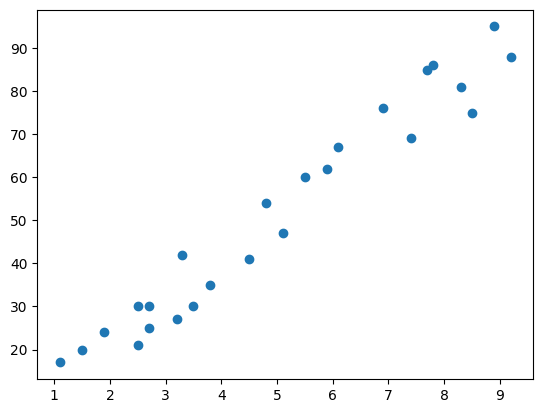

In [ ]:
plt.scatter(x=data['Hours'],y=data['Scores'])

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error
from sklearn.model_selection import KFold,cross_validate,train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(data['Hours'],data['Scores'],test_size=0.2,random_state=42,shuffle=True)

In [ ]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)


In [ ]:
model = LinearRegression()
kfold = KFold(n_splits=6,shuffle=True,random_state=42)
scores = cross_validate(model ,X_train, y_train ,cv=kfold,scoring = 'neg_mean_squared_error',return_train_score=True)

In [ ]:
scores

{'fit_time': array([0.001858  , 0.00138927, 0.00192237, 0.00148964, 0.00090146,
        0.00099826]),
 'score_time': array([0.00075293, 0.00050569, 0.00060844, 0.00046253, 0.00029445,
        0.00028348]),
 'test_score': array([-30.72385401, -59.80067244, -42.36062614, -40.75382222,
        -30.87026294, -33.08184725]),
 'train_score': array([-32.65372111, -26.45170217, -29.96630002, -30.93977032,
        -32.43960157, -31.49513446])}

<Axes: >

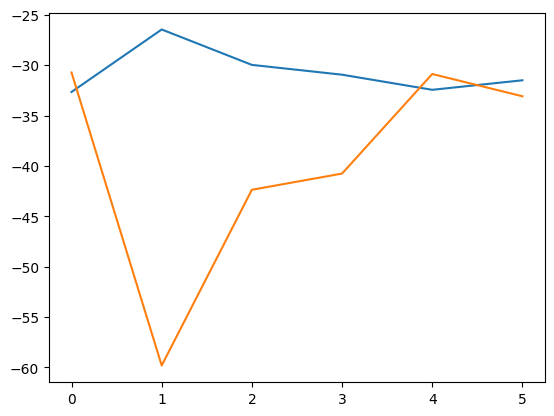

In [ ]:
sns.lineplot(scores['train_score'])
sns.lineplot(scores['test_score'])

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,pred)

3.9207511902099244

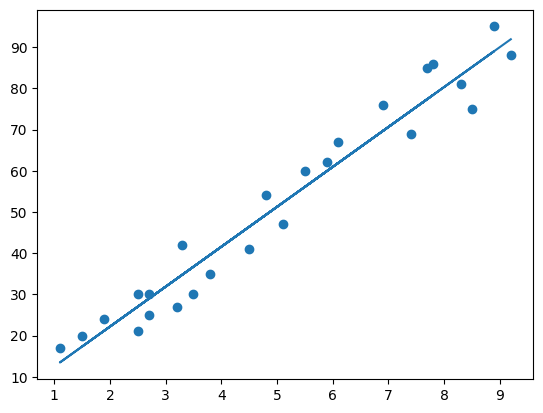

In [ ]:
line = model.coef_ * X_train + model.intercept_
plt.scatter(data['Hours'],data['Scores'])
plt.plot(X_train , line)

In [ ]:
hours = 9.25
own_pred = model.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494
